In [2]:
#install kaggle to ask dataset permission
!pip install kaggle

In [3]:
import os, zipfile
import tensorflow as tf
from tensorflow.keras.layers import Dense,Flatten,Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.applications import VGG16
from tensorflow.keras.models import Sequential

from google.colab import files

In [5]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rianromadhon","key":"2c2871dc3937aee9345df76e711a9f7e"}'}

In [6]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [7]:
!kaggle datasets download -d cactus3/basicshapes

  0% 0.00/402k [00:00<?, ?B/s]
100% 402k/402k [00:00<00:00, 54.7MB/s]


In [8]:
path='/content/basicshapes.zip'
zip_ref = zipfile.ZipFile(path,'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir='/tmp/shapes/shapes'

In [12]:
#image preprocessing
generator = ImageDataGenerator(validation_split=0.2,
                               rescale=1/255)

train_dataset = generator.flow_from_directory(batch_size=20,
                                              directory=base_dir,
                                              target_size=(32,32),
                                              subset='training',
                                              class_mode='categorical')

validation_dataset = generator.flow_from_directory(batch_size=20,
                                                   directory=base_dir,
                                                   target_size=(32,32),
                                                   subset='validation',
                                                   class_mode='categorical')

Found 240 images belonging to 3 classes.
Found 60 images belonging to 3 classes.


In [14]:
#create model (+ transfer learning)
conv_base = VGG16(
                  weights = 'imagenet',
                  include_top = False,
                  input_shape = (32,32,3)
                 )

model = Sequential([conv_base,
                    Flatten(),
                    Dense(250, activation='relu'),
                    Dropout(0.5),
                    Dense(3, activation='softmax')
                    
])

58892288/58889256 [==============================] - 3s 0us/step


In [18]:
#compile and fit model
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(lr=2e-5),
              metrics=['accuracy'])
model.fit(train_dataset, epochs=10, validation_data=validation_dataset, verbose=1, steps_per_epoch=20)

Epoch 1/10
12/20 [=================>............] - 1s 80ms/step - loss: 0.0927 - accuracy: 0.9750 - val_loss: 0.0973 - val_accuracy: 0.9667


Saving ceew.png to ceew.png
ceew.png
THIS IS CIRCLE


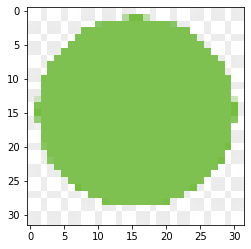

In [21]:
#test model
import numpy as np
from keras.preprocessing import image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline

uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # image prediction
  path = fn
  img = image.load_img(path, target_size=(32,32))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=20)

  print(fn)
  if np.all(classes == [1,0,0]):
    print('THIS IS CIRCLE')
  elif np.all(classes == [0,1,0]):
    print('THIS IS SQUARE')
  elif np.all(classes == [0,0,1]):
    print('THIS IS TRIANGLE')   
  else:
    print('error') 